In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import math

import numpy as np
from PIL import Image
from IPython.display import display, clear_output

from clip_sdf import SDFOptimizer, CLIPSDFConfig

ClipLoss device cuda


In [19]:
optim_config = CLIPSDFConfig(
    learning_rate=0.06,
    batch_size=8,
    init_tolerance=-0.1,
    iters_per_res=10,
    max_iters_per_cam=8,
    camera=CLIPSDFConfig(
        max_num_cameras=16,
        init_num_cameras=8,
        mapping_span=2*math.pi,
        shuffle_order=True,
        mapping_type="sdfdiff",
        cam_scaler=8,
    ),
    loss=CLIPSDFConfig(
        image_loss_weight=1 / 1000,
        sdf_loss_weight=1 / 1000,
        lp_loss_weight=1 / 1000,
    ),
)





image loss:  tensor(57.0312, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) 

sdf loss:  tensor(69.2021, device='cuda:0', grad_fn=<MulBackward0>) 

lp loss:  tensor(5.8678, device='cuda:0', grad_fn=<MulBackward0>) 

loss:  tensor(133.5934, device='cuda:0', grad_fn=<DivBackward0>) 

tolerance: -0.025 


sdf grid res: 64  - iteration: 10  -  cam view idx 8  -  cam iters: 1


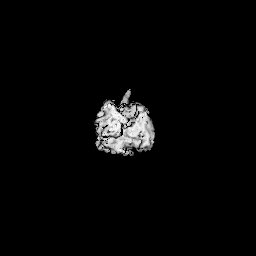

In [20]:
sdf_optimizer = SDFOptimizer(
    config=optim_config,
    sdf_grid_res_list = [16, 24, 40, 64],
)

sdf_optimizer.clip_sdf_optimization(
#     prompt="3D bunny rabbit mesh rendered with maya zbrush",
    prompt="A sculpture of a bunny rabbit",
    experiment_name="test",
)

In [21]:
import os
from IPython.display import Video

In [22]:
sdf_optimizer.generate_visualizations()

Generating ./experiments/test-5/visualizations/generation.mp4


ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

Generating ./experiments/test-5/visualizations/visualization.mp4


ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

In [23]:
os.path.join(sdf_optimizer.results_dir, "visualizations", 'generation.mp4')

'./experiments/test-5/visualizations/generation.mp4'

In [24]:
Video(os.path.join(sdf_optimizer.results_dir, "visualizations", 'generation.mp4'))

In [25]:
Video(os.path.join(sdf_optimizer.results_dir, "visualizations", 'visualization.mp4'))